<h1> 로지스틱 회귀</h1>

<h2>로지스틱 회귀 개요</h2>

이름은 회귀지만 실제로는 분류에 사용한다.(선형 회귀 방식을 분류에 적용하는 방법)

마법의 확률곡선인 시그모이드(sigmoid)함수를 써서 최적선을 찾고 함수의 반환 값을 확률로 간주해 확률로 분류를 결정.

<img src="./img/LogisticRegression1.png"/>

<h2>로지스틱 회귀 예측</h2>
  
시그모이드 함수를 보면 x 값, 즉 피쳐값이 아무리 증가해도 1에 수렴할 뿐임.

x가 플러스 무한대로 되면 자연상수의 지수가 0이 되니까 0이 됨. 즉 1이 됨

x가 마이너스 무한대로 가면 0이 됨

즉 0~1의 값, 확률. 0.5보다 크면 1로 간주, 0.5보다 작으면 0으로 간주

<img src ="./img/LogisticRegression2.png"/>

<h2>시그모이드를 이용한 로지스틱(Logistic) 회귀 예측</h2>

0은 음성, 1은 양성. 악성 종양이라고 한다면 종양 크기가 클 수록 악성일 확률이 높을 것.

왼쪽 그림이 억지스럽다는게, 값을 반환하는거지 악성이냐 아니냐를 판단하는데는 무리가 있다.

반면에 시그모이드로 한다면 1.7보다 큰 종양의 크기는 1로 분류가 된다고 하면 (비록 왼쪽 두개가 잘못 분류되었지만)분류에 로지스틱 회귀를 적용해서 회귀이지만 분류를 수행할 수 있다.

<img src="./img/SigomoidLogistic1.png"/>

<h2>로지스틱 회귀 특징과 사이킷런 로지스틱 회귀 클래스</h2>

요즘은 앙상블에 치여 역사의 뒤안길 같은 존재이지만 엄청난 영향력을 끼치고 있는건 사실임<br>

<img src = "./img/LogisticRegressionClass.png"/>

이제 로지스틱 회귀를 사이킷런에서 구현해보자. 사용할 모델은 위스콘신 유방암 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환(로지스틱 같은 경우 이렇게 해주는게 좋다)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. LogisticRegression(C=1, penalty='l1', solver='liblinear') l1을 수행하기 위해 넣어줌
lr_clf = LogisticRegression(C=1, penalty='l1', solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.965
roc_auc: 0.959


In [9]:
from sklearn.model_selection import GridSearchCV

# l1 모델이 되지 않음. 오류 메시지: ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.
# LogisticRegression() 에 C=1, penalty='l1', solver='liblinear' 넣어줘서 해결
# params={'penalty':['l2', 'l1'],
params={'penalty':['l2', "l1"],
        'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.979


## 5.8 회귀 트리

<h2>회귀 트리 개요</h2>

* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능  
* 이는 트리가 CART(Classification and Regression Tree) 기반으로 만들어졌기 때문. CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘  
* CART 회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS(SSE)가 최소가 될 수 있는 기준을 찾아서 분할 됨  
* 최종 분할이 완료 된 후에 각 분할 영역에 있는 데이터 결정값들의 평균 값으로 학습/예측  

<h2>회귀 트리 프로세스</h2>


한 유형의 데이터 세트가 있는데 이것들을 회귀 트리로 만든다고 한다면

1. 첫번째 분할하기 위해서 RSS를 최소화 하는 기준에 따라 분할(예시에선 임의로 정했음)  

2. 구간에 해당하는 데이터값(타겟값)을 평균을 내서 최종적으로 평균 Y값으로 부여하는게 CART  


<img src="./img/RegressionTreeProcess.png"/>

<h2>사이킷런의 회귀 트리 지원</h2>


<img src="./img/RegressionTree1.png"/>

<h2>회귀 트리의 오버 피팅</h2>

max_depth를 7로 했더니 너무 오버피팅.  

<img src = "./img/RegressionTreeOverfitting.png"/>

보스턴 주택가격을 이용해서 **회귀 트리**를 코드로 구현

In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [11]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

**사이킷런의 여러 회귀 트리 클래스를 이용하여 회귀 예측**

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 
[12:32:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:32:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 4.089 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 4.646 


**회귀 트리는 선형 회귀의 회귀 계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있습니다.**

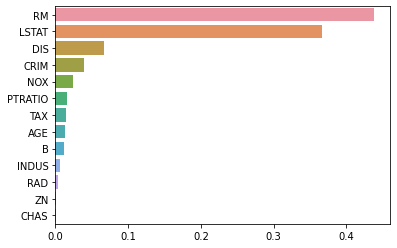

In [13]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


위의 결과를 보니, 트리에서도 RM이 중요하게 나온다.

**오버피팅을 시각화 하기 위해 한개의 피처 RM과 타겟값 PRICE기반으로 회귀 예측 수행**

(100, 2)


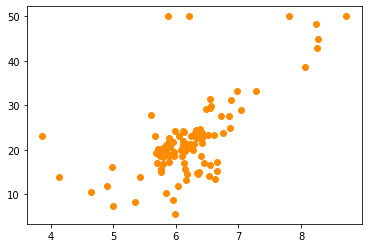

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지. 간격은 0.04 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


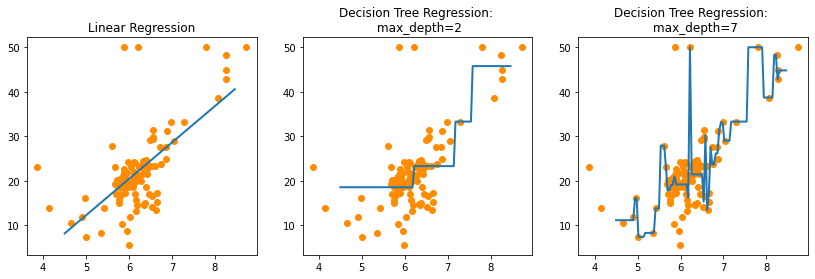

In [18]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)